In [69]:
print('start')
import os
import json
import cv2
import numpy as np
import torch
from torchvision import models, transforms
from PIL import Image
from os import mkdir,path
from shutil import rmtree
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

start


## prepare folders

In [70]:
image_index=12

In [71]:
if path.isdir('test'):
    rmtree('test')
if path.isdir('results'):
    rmtree('results')

In [72]:
mkdir('test')
mkdir('results')

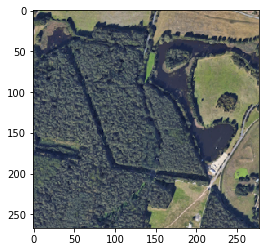

In [73]:
small_image=Image.open('data/{}_small.png'.format(image_index)).convert('RGB')
small_image.save('test/small.png')

big_image=Image.open('data/{}_big.png'.format(image_index)).convert('RGB')
big_image_cv2_plis=cv2.imread('data/{}_big.png'.format(image_index))

# small_image=Image.open('data/three_js/{}_photo-4.png'.format(image_index)).convert('RGB')
# small_image.save('test/small.png')

# big_image=Image.open('data/three_js/{}_photo-3.png'.format(image_index)).convert('RGB')
# big_image_cv2_plis=cv2.imread('data/three_js/{}_photo-3.png'.format(image_index))

plt.imshow(big_image)

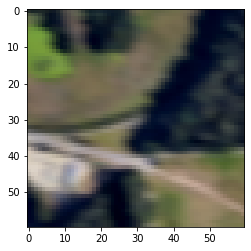

In [74]:
plt.imshow(small_image)

## prepare einvironemnt

In [75]:
# with open('data/data_compute/data.json') as json_file:
#     json_data=json.load(json_file)
#     print(json_data['objects'][0]['id'])
    
# print(json_data)


In [76]:
# def computeSquareError(top_pred,left_pred,bottom_pred,right_pred,goodObj):
#     small_width,small_height=small_image.size
#     big_width,big_height=big_image.size
    
    
    
#     topErr= (goodObj['top']-top_pred)**2
#     leftErr= (goodObj['left']-left_pred)**2
#     rightErr=((big_width-goodObj['left']-small_width) - left_pred)**2
#     bottomErr=((big_height-goodObj['top']-big_height) - bottom_pred)**2
    
#     return topErr+leftErr+rightErr+bottomErr


## transforms

In [77]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms_small = transforms.Compose([
#     transforms.CenterCrop(64),
    # below are for tests
#     transforms.ColorJitter(brightness=1,contrast=1,saturation=1),
    transforms.ToTensor(),
    normalize
])

data_transforms_big = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

In [78]:
big_image_transform=data_transforms_big(big_image)
plt.imsave('test/big.png',big_image_transform.numpy()[2])

big_image_transform=big_image_transform.numpy().transpose(1, 2, 0)
big_image_transform=big_image_transform.astype(np.float32)
plt.imsave('test/big2.png',big_image_transform[0])
# big_image_transform


In [79]:
small_images_torch=[]

In [80]:
for rotate_angle in range(0,360,10):
#     small_image_transform=small_image.resize((85,85),Image.ANTIALIAS).rotate(rotate_angle)
    small_image_transform=small_image.rotate(rotate_angle)
    small_image_transform.save('test/zzz{}.png'.format(rotate_angle))
    
    small_image_torch = data_transforms_small(small_image_transform)
    
    if rotate_angle%20==0:
        plt.imsave('test/test-{}.png'.format(rotate_angle),small_image_torch.numpy()[0])
        
    
    small_images_torch.append(small_image_torch.unsqueeze(0))

In [81]:
print(small_images_torch[10].size())
len(small_images_torch)

torch.Size([1, 3, 60, 60])


36

## cv2 template

In [82]:
max_m=-100
max_loc=None

for torch_image in small_images_torch:
    template_image=torch_image[0].numpy().transpose(1, 2, 0)
    template_image=template_image.astype(np.float32)
    
    w, h = template_image.shape[:-1]
    
    result = cv2.matchTemplate(big_image_transform, template_image, cv2.TM_CCOEFF_NORMED)
  
    if np.amax(result)>max_m:
        max_m=np.amax(result)
        print(max_m,max_loc)
    loc = np.where(result >= max_m)

    for pt in zip(*loc[::-1]): 
        max_loc=pt
        print(max_m,max_loc)
        

print(max_m,max_loc)
cv2.rectangle(big_image_cv2_plis, max_loc, (max_loc[0]+ h, max_loc[1]+ w),(0, 0, 255), 1)


0.3419139 None
0.3419139 (110, 197)
0.34400073 (110, 197)
0.34400073 (214, 41)
0.38798326 (214, 41)
0.38798326 (171, 173)
0.4395056 (171, 173)
0.4395056 (172, 173)
0.5285153 (172, 173)
0.5285153 (199, 189)
0.79915565 (199, 189)
0.79915565 (199, 189)
0.79915565 (199, 189)


array([[[ 79,  63,  52],
        [ 81,  73,  66],
        [ 88,  92,  89],
        ...,
        [139, 157, 177],
        [146, 166, 186],
        [126, 151, 165]],

       [[ 86,  85,  74],
        [ 80,  78,  69],
        [ 77,  73,  67],
        ...,
        [138, 153, 172],
        [145, 164, 181],
        [148, 171, 183]],

       [[ 86,  91,  80],
        [ 87,  93,  85],
        [ 88,  96,  97],
        ...,
        [ 98, 106, 118],
        [116, 130, 144],
        [127, 145, 162]],

       ...,

       [[102,  95,  90],
        [ 98,  88,  82],
        [ 95,  89,  82],
        ...,
        [ 74,  48,  37],
        [ 62,  38,  22],
        [ 67,  45,  30]],

       [[ 93,  87,  87],
        [ 94,  87,  82],
        [ 94,  89,  81],
        ...,
        [ 80,  53,  42],
        [ 67,  40,  25],
        [ 72,  53,  39]],

       [[105, 107, 106],
        [107, 111, 109],
        [ 87,  77,  71],
        ...,
        [ 76,  48,  37],
        [ 79,  61,  46],
        [ 75,  54,  39]]

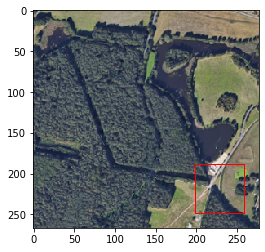

In [83]:
cv2.imwrite('results/finall_image.png', big_image_cv2_plis)
plt.imshow(big_image_cv2_plis[:,:,::-1])

In [85]:
print('end')

end
